# **Adam (Adaptive Moment Estimation)**

Adam is an optimization algorithm that combines the best features of **Momentum-based Gradient Descent and RMSprop** to provide an efficient and adaptive learning rate for training deep neural networks.

#### **Why Do We Need Adam?**

Standard gradient descent has two main challenges:

1. **Slow convergence:** If the learning rate is too small, training takes a long time.

2. **Unstable updates:** If the learning rate is too large, the optimizer might overshoot or oscillate.

Adam addresses these issues by adapting the learning rate individually for each parameter using **momentum and adaptive scaling**.

---

### **The Intuition Behind Adam**

Adam maintains two moving averages during training:


1. **First Moment Estimate** ($m_t$) — **Momentum Term**

- Similar to **Momentum-based Gradient Descent**, it smooths out the gradient updates.

- Instead of using just the raw gradient, it uses an **exponential moving average** of past gradients:

$$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$$

- This helps to accelerate the learning in consistent gradient directions.


2. **Second Moment Estimate** ($v_t$) — **RMSprop Term**

- Instread of treating all parameters equally, it keeps track of past squared gradients to normalize the updates.

- Similar to RMSprop, it uses an **exponential moving average** of past squared gradients:

$$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$$


3. **Bias Correction**

- Since $m_t$ and $v_t$ are initialized to zero, they are biased towards zero in the early iterations.

- To correct this bias, Adam uses:

$$ \hat{m_t} = \frac{m_t}{1 - \beta_1^t} $$
$$ \hat{v_t} = \frac{v_t}{1 - \beta_2^t} $$

- This ensures proper updates, especially at the beginning of training.


4. **Parameter Update Rule**

- The final update rule for a parameter $\theta$ is:
$$ \theta_{t} = \theta_{t-1} - \frac{\alpha}{\sqrt{\hat{v_t}} + \epsilon} \cdot \hat{m_t} $$

- Here,
    - $\alpha$ is the learning rate.
    - $\epsilon$ is a small constant to avoid division by zero.
    - $\hat{m_t}$ is the bias-corrected first moment estimate.
    - $\hat{v_t}$ is the bias-corrected second moment estimate.

---

### **Choosing Hyperparameters**

The default settings of Adam work well in most cases:

| Hyperparameter | Value | Effect |
| --- | --- | --- |
| $\alpha$ (Learning Rate) | 0.001 | Determines the step size for parameter updates. |
| $\beta_1$ (Momentum) | 0.9 | Smoothing factor for the first moment estimate. |
| $\beta_2$ (RMSprop) | 0.999 | Smoothing factor for the second moment estimate. |
| $\epsilon$ | $10^{-8}$ | Small constant to avoid division by zero. |

---

### ✅ **Advantages of Adam**
- **Adaptive Learning Rate:** Different parameters have different step sizes, making training more efficient.
-  **Faster Convergence:** Momentum helps move quickly in useful directions.
- **Handles Noisy Gradients:** Works well for non-stationary and sparse gradients.
- **Minimal Tuning Required:** Default hyperparameters often work well.
- **Works for Large Datasets:** Efficient for high-dimensional problems.

### ❌ **Disadvantages of Adam**
-  **Can Converge to Sharp Minima:** Sometimes leads to suboptimal solutions.
- **May Not Generalize Well:** Solutions found by Adam may have worse test performance.
- **Requires More Memory:** Stores both $m_t$ and $v_t$, increasing memory usage.

---

### **Conclusion**

**Adam** (**Adaptive Moment Estimation**) is one of the most popular optimizers in deep learning because it combines the benefits of momentum and adaptive learning rates. It converges quickly, adapts well to different datasets, and requires minimal tuning. However, it may not always generalize as well as **Gradient Descent (GD) with momentum**, so testing different optimizers is always recommended.

---

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Example function: f(x) = x^2 (simple quadratic loss)
def gradient(x):
    return 2*x  # Derivative of f(x) = x^2

In [43]:
# Initialize variables
x_init = 4  # Start at x=4
iterations = 100  # Number of iterations

## **Standard Gradient Descent**

In [44]:
# Run standard gradient descent for comparison
x = x_init
alpha = 0.1  # Learning rate

x_history_standard = [x]

for _ in range(iterations):
    grad = gradient(x)
    x = x - alpha * grad
    x_history_standard.append(x)

## **Momentum-based Gradient Descent**

In [45]:
# Run gradient descent with momentum
x = x_init  # Start at x=10
alpha = 0.1  # Learning rate
beta = 0.9  # Decay rate for squared gradient moving average
v = 0  # Initialize velocity

x_history_momentum = [x]

for _ in range(iterations):
    grad = gradient(x)
    v = beta * v + (1 - beta) * grad  # Update velocity
    x = x - alpha * v  # Update x position
    x_history_momentum.append(x)

## **RMSprop (Root Mean Square Propagation)**

In [46]:
# Run RMSprop for 50 iterations
x = x_init  # Start at x=10
beta = 0.9  # Decay rate for squared gradient moving average
Eg2 = 0  # Initialize squared gradient moving average
epsilon = 1e-8  # Small constant to avoid division by zero

x_history_rmsprop = [x]

for _ in range(iterations):
    grad = gradient(x)  # Compute gradient
    Eg2 = beta * Eg2 + (1 - beta) * grad**2  # Update moving average
    x = x - (alpha / (np.sqrt(Eg2) + epsilon)) * grad  # Update parameter
    x_history_rmsprop.append(x)

## **Adam (Adaptive Moment Estimation)**

In [47]:
# Initialize variables
x = x_init
alpha = 0.01  # Learning rate
beta1 = 0.9  # Momentum term
beta2 = 0.999  # RMSprop scaling term
epsilon = 1e-8  # Small constant to prevent division by zero

# Initialize Adam variables
m = 0  # First moment estimate
v = 0  # Second moment estimate
t = 0  # Time step

# Store x values for plotting
x_history_adam = [x]

# Run Adam optimization
for _ in range(iterations):
    t += 1
    grad = gradient(x)  # Compute gradient

    # Update biased moment estimates
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad ** 2)

    # Bias correction
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)

    # Update x
    x = x - (alpha / (np.sqrt(v_hat) + epsilon)) * m_hat
    x_history_adam.append(x)

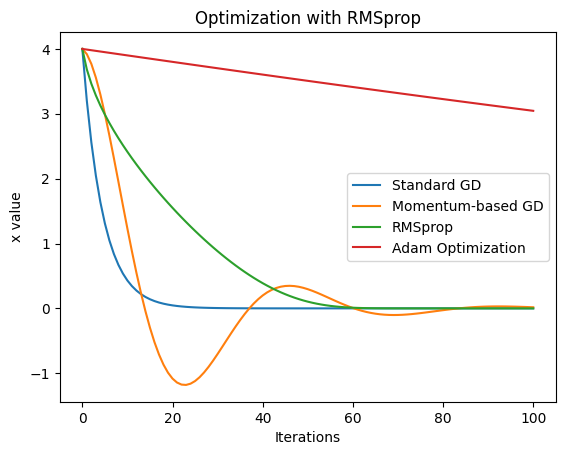

In [48]:
# Plot results
plt.plot(x_history_standard, label="Standard GD")
plt.plot(x_history_momentum, label="Momentum-based GD")
plt.plot(x_history_rmsprop, label="RMSprop")
plt.plot(x_history_adam, label="Adam Optimization")

plt.xlabel("Iterations")
plt.ylabel("x value")
plt.title("Optimization with RMSprop")
plt.legend()
plt.show()